In [57]:
pip install selenium


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import re

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Selenium 웹 드라이버 설정 (Chrome 드라이버 사용)
driver = webdriver.Chrome()

# 페이지 접속
url = "https://search.naver.com/search.naver?where=view&query=%EC%98%81%ED%86%B5%EA%B5%AC%20%EB%A7%9B%EC%A7%91&sm=tab_opt&nso=so%3Ar%2Cp%3A3m%2Ca%3Aall&mode=normal&main_q=&st_coll=&topic_r_cat="
driver.get(url)

# 스크롤 다운 함수 정의
def scroll_down():
    # 스크롤 위치 저장
    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    while True:
        # 스크롤 다운
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        
        # 페이지 로딩 대기
        time.sleep(2)
        
        # 스크롤 위치 갱신
        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        
        # 스크롤이 더 이상 되지 않으면 종료
        if new_height == last_height:
            break
            
        last_height = new_height

# 스크롤 다운 실행
scroll_down()

# BeautifulSoup으로 페이지 파싱
soup = BeautifulSoup(driver.page_source, "html.parser")

# 데이터 추출
ul = soup.select_one("div._more_contents_event_base ul")
li_list = ul.find_all("li")

data = []
for li in li_list:
    title = li.find("a").text.strip()
    content = li.find("div", class_="total_group").text.strip()
    data.append({"제목": title, "내용": content})

# 데이터프레임 생성
df = pd.DataFrame(data)
print(df)

# 웹 드라이버 종료
driver.quit()


          제목                                                 내용
0    문서 저장하기  맛과 가성비가 좋은 한우 맛집 얼마 전 등산 후 옆지기와 들른 영통구 맛집 경성89...
1    문서 저장하기  수원 영통구 맛집이기에 회식 때 맛있는 술 한 잔 같이 해도 좋지 않을까? 영어, ...
2    문서 저장하기  수원 영통구 이의동 광교아브뉴프랑에 위치한 '335kitchen'에 다녀왔어요 :)...
3    문서 저장하기  일단 올리고 먹고 후기 포스팅은 나중에 쓸게요^^❤️ 실시간이 불편하신 분들은 뒤로...
4    문서 저장하기  어서오시게 영통구청점 수원 영통구 맛집&수원 대게 포장 화-토 11:00-01:00...
..       ...                                                ...
104  문서 저장하기  수원족발맛집 나다오족발 영통구배달맛집 영통 맛집 나다오 족발 위치 : 수원시 영통구...
105  문서 저장하기  이번에 방문 한 곳은 영통구 망포역 인근에 위치한 냉동삼겹살 전문점 삼삼오입니다. ...
106  문서 저장하기  수원 영통구에 위치한 일식집에 다녀왔어요. 원래 가려던 곳이 있었는데 하필 그날 문...
107  문서 저장하기  영통구 매탄동 리드인 텍스트의 포도밭 독서논술토론 국어 자기주도학습 주요 내용 모아...
108  문서 저장하기  그런 맛도 있는 것 같다 : ) 수원 영통구에서 치뤄진 인사자리 그 중에서도 한정식...

[109 rows x 2 columns]


In [59]:
df

,제목,내용
0,문서 저장하기,맛과 가성비가 좋은 한우 맛집 얼마 전 등산 후 옆지기와 들른 영통구 맛집 경성89...
1,문서 저장하기,"수원 영통구 맛집이기에 회식 때 맛있는 술 한 잔 같이 해도 좋지 않을까? 영어, ..."
2,문서 저장하기,수원 영통구 이의동 광교아브뉴프랑에 위치한 '335kitchen'에 다녀왔어요 :)...
3,문서 저장하기,일단 올리고 먹고 후기 포스팅은 나중에 쓸게요^^❤️ 실시간이 불편하신 분들은 뒤로...
4,문서 저장하기,어서오시게 영통구청점 수원 영통구 맛집&수원 대게 포장 화-토 11:00-01:00...
...,...,...
104,문서 저장하기,수원족발맛집 나다오족발 영통구배달맛집 영통 맛집 나다오 족발 위치 : 수원시 영통구...
105,문서 저장하기,이번에 방문 한 곳은 영통구 망포역 인근에 위치한 냉동삼겹살 전문점 삼삼오입니다. ...
106,문서 저장하기,수원 영통구에 위치한 일식집에 다녀왔어요. 원래 가려던 곳이 있었는데 하필 그날 문...
107,문서 저장하기,영통구 매탄동 리드인 텍스트의 포도밭 독서논술토론 국어 자기주도학습 주요 내용 모아...


In [60]:
#크롤링한 데이터를 csv형식으로 저장
df.to_csv('/Users/jiyugyeong/Downloads/crawl.csv')
# crawl.csv를 KoNLPy를 이용하여 형태소 분석, 음식명 추출하기

In [61]:
df_train = pd.read_csv("data/train.csv")

In [62]:
df_test = pd.read_csv("data/test.csv")

In [63]:
df_train

,menu,type,sex,waiting_time,price,weather,satisfaction
0,1,1,1,1,1,0,1
1,0,0,1,4,0,2,0
2,1,1,0,1,1,1,1
3,0,0,1,2,1,0,1
4,7,1,1,1,1,0,1
5,0,1,0,1,0,1,1
6,0,0,0,4,1,0,1
7,7,0,0,3,1,0,1
8,0,1,0,1,1,0,1
9,0,0,1,2,1,1,1


In [64]:
df_train.head()

,menu,type,sex,waiting_time,price,weather,satisfaction
0,1,1,1,1,1,0,1
1,0,0,1,4,0,2,0
2,1,1,0,1,1,1,1
3,0,0,1,2,1,0,1
4,7,1,1,1,1,0,1


In [65]:
import seaborn as sns

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

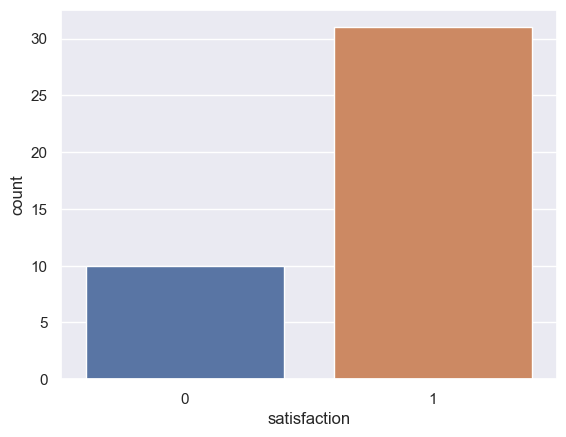

In [66]:
sns.countplot(x='satisfaction', data=df_train)

<AxesSubplot:xlabel='menu', ylabel='count'>

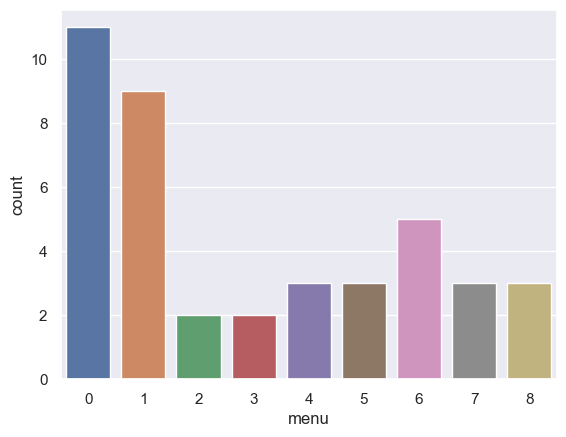

In [67]:
sns.countplot(x='menu', data=df_train)

<AxesSubplot:xlabel='waiting_time', ylabel='count'>

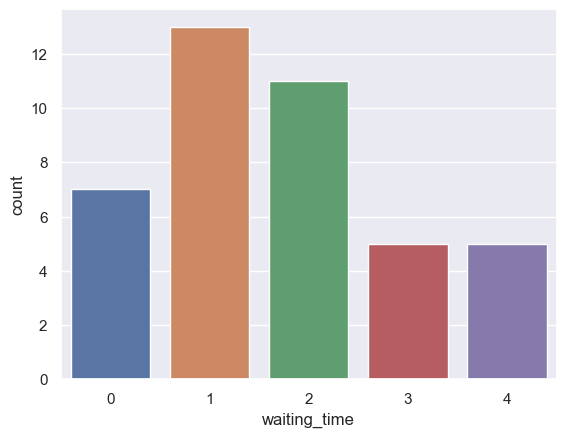

In [68]:
sns.countplot(x='waiting_time', data=df_train)

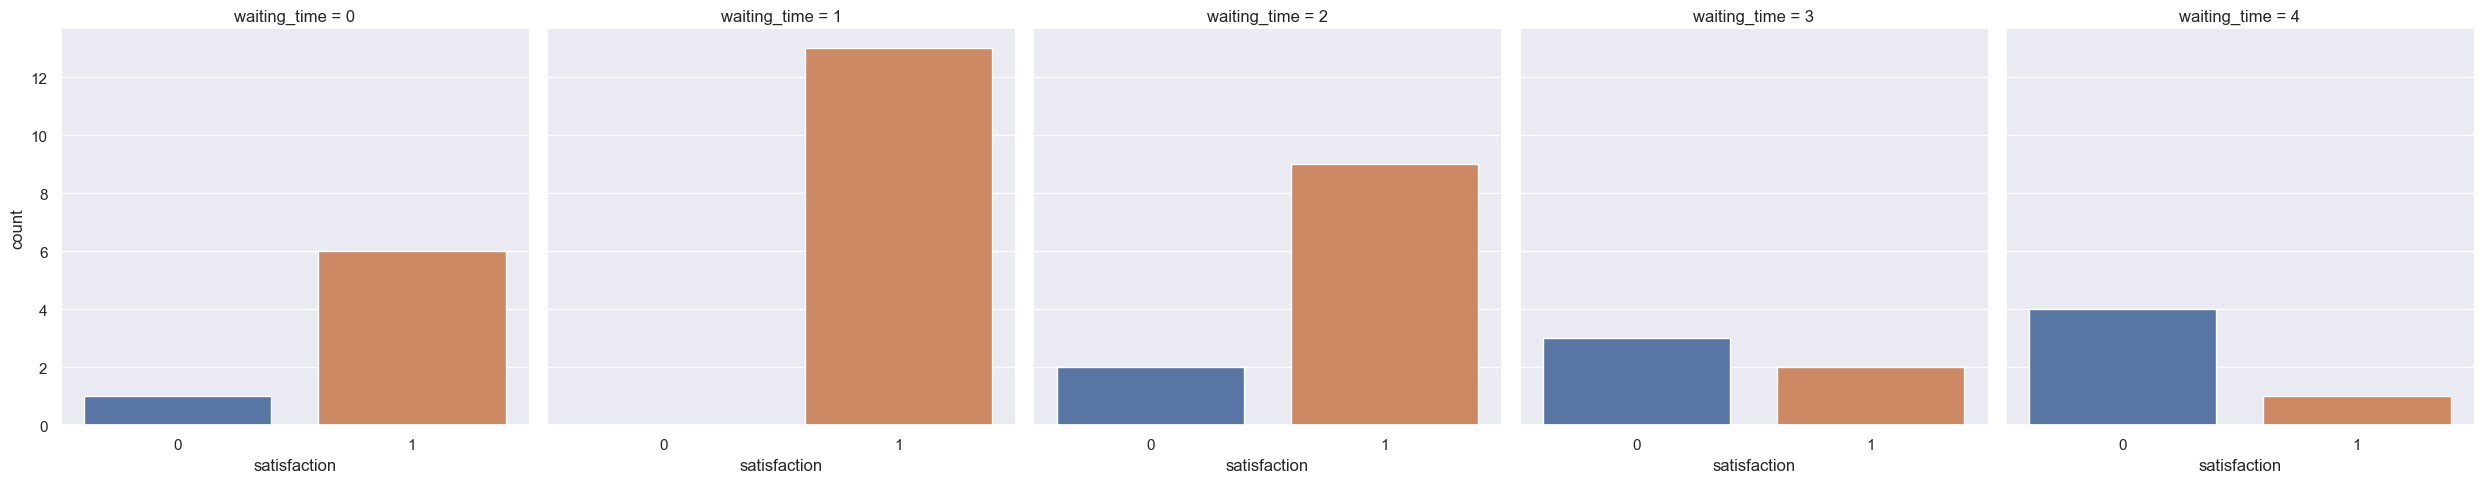

In [69]:
sns.catplot(x='satisfaction', col='waiting_time', kind='count', data=df_train)

<AxesSubplot:xlabel='weather', ylabel='count'>

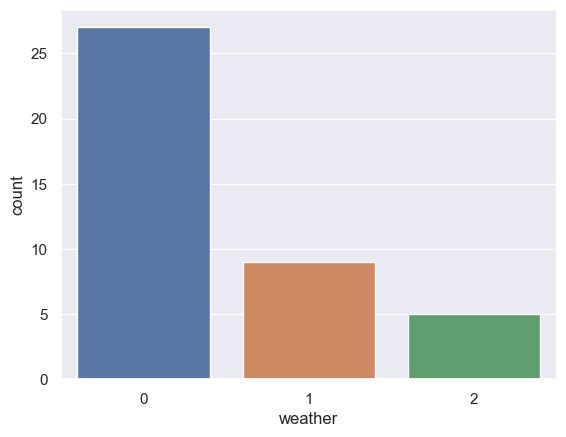

In [70]:
sns.countplot(x='weather', data=df_train)

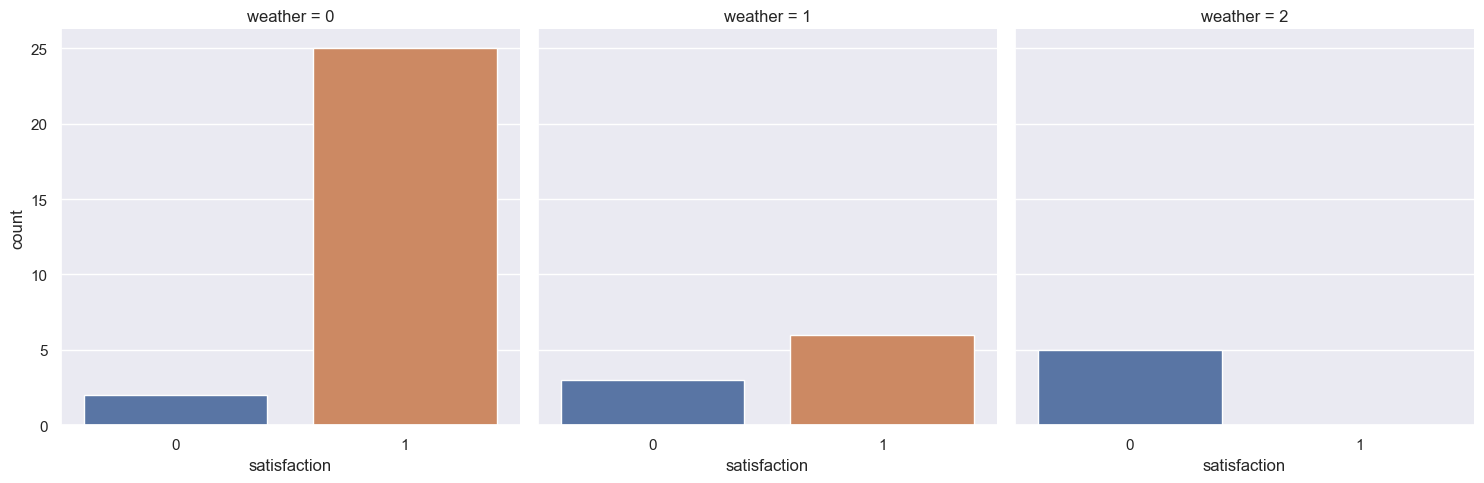

In [71]:
sns.catplot(x='satisfaction', col='weather', kind='count', data=df_train)

In [72]:
menu_train = df_train.menu

In [73]:
data = pd.concat([df_train.drop(['menu'], axis=1), df_test])
data.head()

,type,sex,waiting_time,price,weather,satisfaction
0,1,1,1,1,0,1
1,0,1,4,0,2,0
2,1,0,1,1,1,1
3,0,1,2,1,0,1
4,1,1,1,1,0,1


In [74]:
#결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   type          47 non-null     int64
 1   sex           47 non-null     int64
 2   waiting_time  47 non-null     int64
 3   price         47 non-null     int64
 4   weather       47 non-null     int64
 5   satisfaction  47 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [75]:
data_train = data.iloc[:41]
data_test = data.iloc[41:]

In [76]:
x = data_train.values
test = data_test.values
y = menu_train.values

In [77]:
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

In [78]:
from sklearn.tree import export_graphviz

import graphviz
from PIL import Image


export_graphviz(clf, out_file="tree.dot",
feature_names = data_train.columns.values, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8'],
                rounded=True, filled=True)

In [79]:
with open("tree.dot") as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'

In [80]:
Y_pred = clf.predict(test)
df_test['prediction menu'] = Y_pred
clf.score(x, y)

0.7560975609756098

In [81]:
df_test.head()

,type,sex,waiting_time,price,weather,satisfaction,prediction menu
0,1,1,0,0,0,1,6
1,0,1,4,2,2,0,4
2,0,0,1,0,1,1,0
3,1,0,3,3,0,0,4
4,1,1,1,0,0,1,1
